In [1]:
from IPython.display import Image

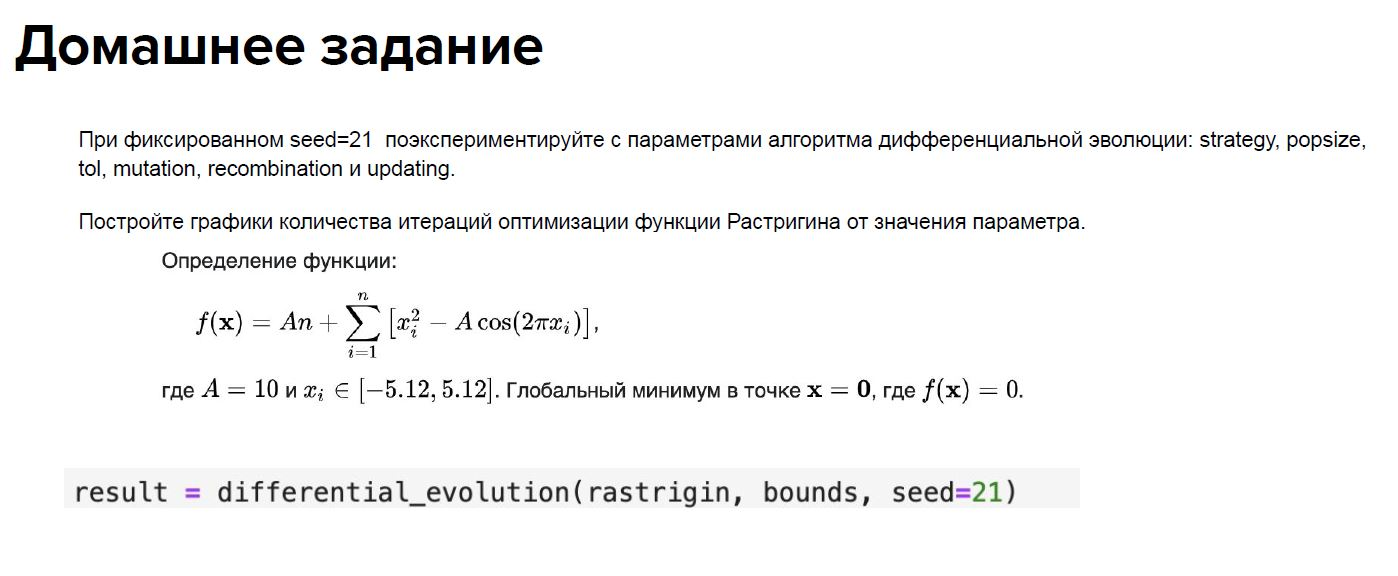

In [2]:
Image("C:\Мои занятия\Нетология\Математика для DS(18)\Лекция 7\hw.JPG")

In [5]:
import numpy as np
from scipy.optimize import differential_evolution
import matplotlib.pyplot as plt
import math
import optuna

In [6]:
def rastrigin(X):
    A = 10
    return A*len(X) + sum([(x**2 - A * np.cos(2 * math.pi * x)) for x in X])

bounds = [(-10, 10), (-10, 10)]

result = differential_evolution(rastrigin, bounds, seed=21)
result

     fun: 0.0
 message: 'Optimization terminated successfully.'
    nfev: 2253
     nit: 74
 success: True
       x: array([-3.41780382e-09, -1.34164679e-09])

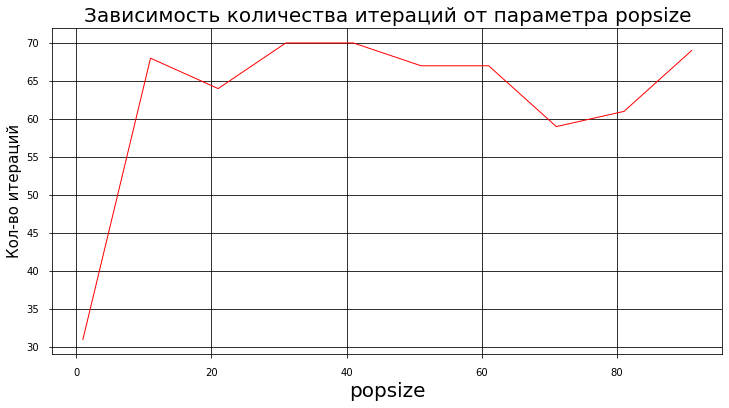

In [7]:
# popsize - Множитель для установки окончательного размера популяции

i  =  1 
res  =  [] 
param  =  [] 
while  i  <=  100:     
    res.append(differential_evolution(rastrigin,  bounds,  popsize=i,  seed=42 )['nit']) 
    param.append(i) 
    i += 10 

fig, ax = plt.subplots()
ax.plot(param,  res, color = 'r', linewidth = 1)
ax.grid(which='major', color = 'k')
ax.tick_params(axis = 'both', pad = 10, labelsize = 10)

fig.set_figwidth(12)
fig.set_figheight(6)

plt.title('Зависимость количества итераций от параметра popsize', size=20)
plt.ylabel('Кол-во итераций', size = 15) 
plt.xlabel('popsize', size = 20) 
plt.show()


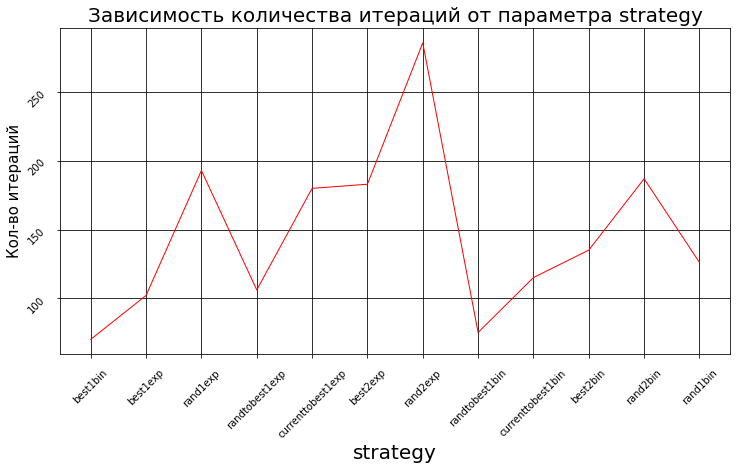

In [8]:
# strategy - Стратегия для использования, по умолчанию используется best2bin

i  =  1 
res  =  [] 
param  =  []

for i in ['best1bin', 'best1exp', 'rand1exp', 'randtobest1exp', 'currenttobest1exp', 'best2exp','rand2exp','randtobest1bin', 'currenttobest1bin', 'best2bin', 'rand2bin', 'rand1bin']:
    res.append(differential_evolution(rastrigin,  bounds,  strategy=i,  seed=42 )['nit']) 
    param.append(i)
    
fig, ax = plt.subplots()
ax.plot(param,  res, color = 'r', linewidth = 1)
ax.grid(which='major', color = 'k')
ax.tick_params(axis = 'both', pad = 10, labelsize = 10, labelrotation = 45)

fig.set_figwidth(12)
fig.set_figheight(6)

plt.title('Зависимость количества итераций от параметра strategy', size=20)
plt.ylabel('Кол-во итераций', size = 15) 
plt.xlabel('strategy', size = 20) 
plt.show()

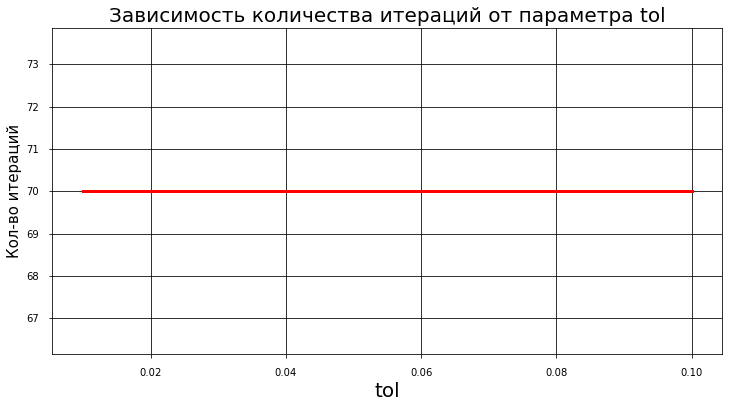

In [9]:
# tol - относительная толерантность к конвергенции

res  =  [] 
param  =  []

for i in [0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1]:
    res.append(differential_evolution(rastrigin,  bounds,  tol=i,  seed=42 )['nit']) 
    param.append(i)
    
fig, ax = plt.subplots()
ax.plot(param,  res, color = 'r', linewidth = 3)
ax.grid(which='major', color = 'k')
ax.tick_params(axis = 'both', pad = 10, labelsize = 10)

fig.set_figwidth(12)
fig.set_figheight(6)

plt.title('Зависимость количества итераций от параметра tol', size=20)
plt.ylabel('Кол-во итераций', size = 15) 
plt.xlabel('tol', size = 20) 
plt.show()

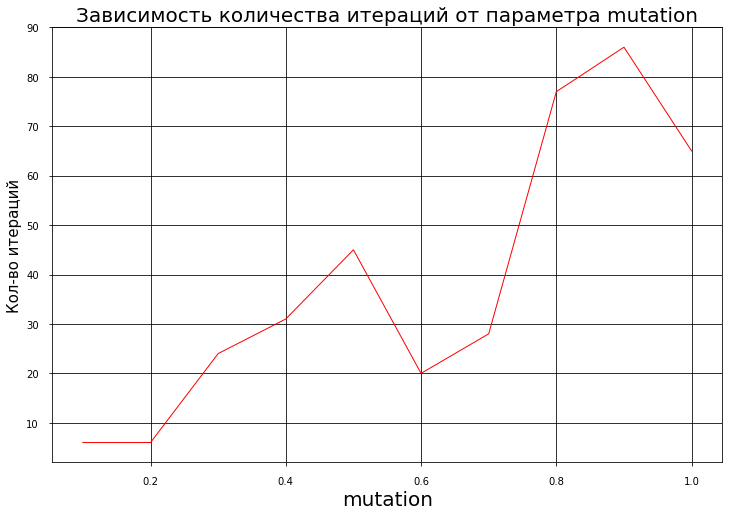

In [10]:
# mutation - константа мутации, по другому называют дифференциальный вес. Увеличение константы мутации увеличивает радиус поиска, но замедляет конвергенцию

res  =  [] 
param  =  []

for i in [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]:
    res.append(differential_evolution(rastrigin,  bounds,  mutation=i,  seed=42 )['nit']) 
    param.append(i)
    
fig, ax = plt.subplots()
ax.plot(param,  res, color = 'r', linewidth = 1)
ax.grid(which='major',
        color = 'k')
ax.tick_params(axis = 'both', pad = 10, labelsize = 10)

fig.set_figwidth(12)
fig.set_figheight(8)

plt.title('Зависимость количества итераций от параметра mutation', size=20)
plt.ylabel('Кол-во итераций', size = 15) 
plt.xlabel('mutation', size = 20) 
plt.show()

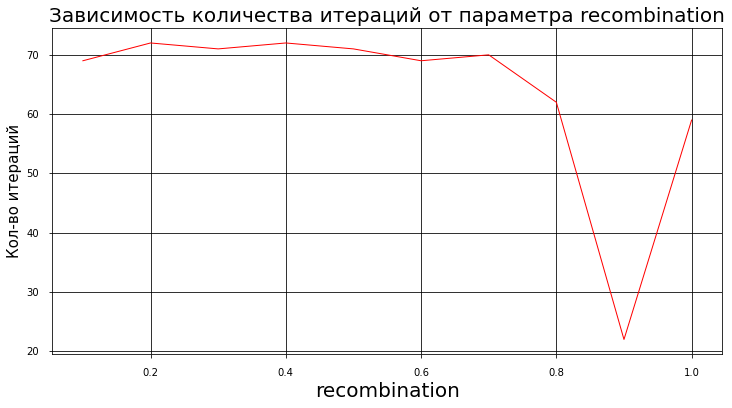

In [11]:
# recombination - константа рекомбинации или возможность перехода.

res  =  [] 
param  =  []

for i in [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]:
    res.append(differential_evolution(rastrigin,  bounds,  recombination=i,  seed=42 )['nit']) 
    param.append(i)
    
fig, ax = plt.subplots()
ax.plot(param,  res, color = 'r', linewidth = 1)
ax.grid(which='major', color = 'k')
ax.tick_params(axis = 'both', pad = 10, labelsize = 10)

fig.set_figwidth(12)
fig.set_figheight(6)

plt.title('Зависимость количества итераций от параметра recombination', size=20)
plt.ylabel('Кол-во итераций', size = 15) 
plt.xlabel('recombination', size = 20) 
plt.show()

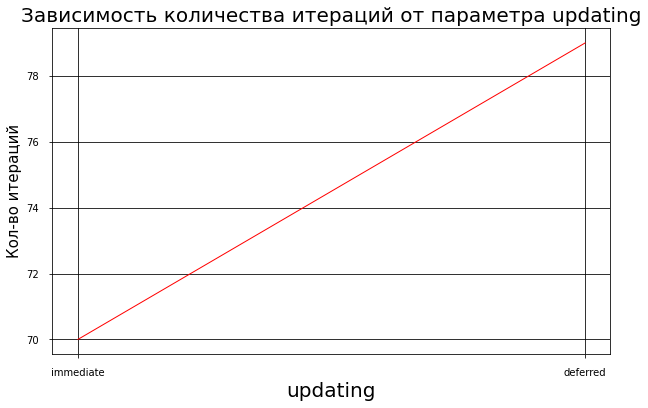

In [13]:
# updating: immediate - вектор лучшего решения постоянно обновляется в течение одного поколения. Это ведет к быстрой конвергенции.
#           deferred - вектор обновляется один раз за поколение.

res  =  [] 
param  =  []

for i in ['immediate', 'deferred']:
    res.append(differential_evolution(rastrigin,  bounds, seed=42, updating=i )['nit']) 
    param.append(i)
    
fig, ax = plt.subplots()
ax.plot(param,  res, color = 'r', linewidth = 1)
ax.grid(which='major',
        color = 'k')

ax.tick_params(axis = 'both', pad = 10, labelsize = 10)

fig.set_figwidth(10)
fig.set_figheight(6)

plt.title("Зависимость количества итераций от параметра updating", size=20)
plt.ylabel('Кол-во итераций', size = 15) 
plt.xlabel('updating', size = 20) 
plt.show()

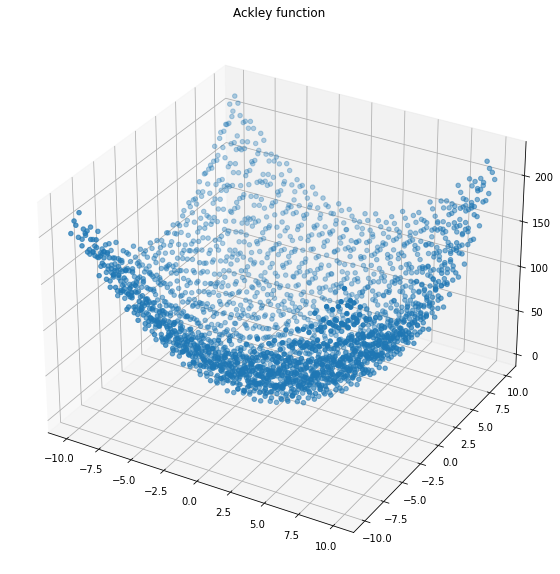

Итераций: 70


In [14]:
def rastrigin(X):
    A = 10
    return A*len(X) + sum([(x**2 - A * np.cos(2 * math.pi * x)) for x in X])

bounds = [(-10, 10), (-10, 10)]

x = []
y = []
z = []
pts = 50
for i in np.linspace(bounds[0][0], bounds[0][1], pts):
    for j in np.linspace(bounds[1][0], bounds[1][1], pts):
        x.append(i)
        y.append(j)
        z.append(rastrigin([i, j]))

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(projection='3d')
ax.scatter(x, y, z)
ax.set_title("Ackley function")
plt.show()


result = differential_evolution(rastrigin, bounds, seed=42)
print(f"Итераций: {result.nit}")

Минимум итераций: 70, stategy = 'best1bin'.


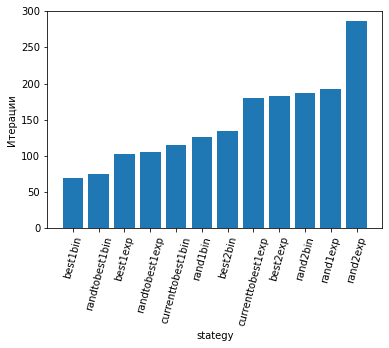

In [15]:
strategies = ["best1bin", "best1exp", "rand1exp", "randtobest1exp", "currenttobest1exp", "best2exp",
    "rand2exp", "randtobest1bin", "currenttobest1bin", "best2bin", "rand2bin", "rand1bin"]
st = {}
for strategy in strategies:
    p = differential_evolution(rastrigin, bounds, seed=42, strategy=strategy)
    st[strategy] = p.nit
st = {k: v for k, v in sorted(st.items(), key=lambda item: item[1])}

mk_st = min(st, key=st.get)
mv_st = st[mk_st]
print(f"Минимум итераций: {mv_st}, stategy = '{mk_st}'.")
plt.bar(list(st.keys()), list(st.values()))
plt.xlabel("stategy")
plt.ylabel("Итерации")
plt.xticks(rotation=75)
plt.show()

При popsize < 5 результат отличен от x = [0, 0].
Минимум итераций: 18, popsize = 8.


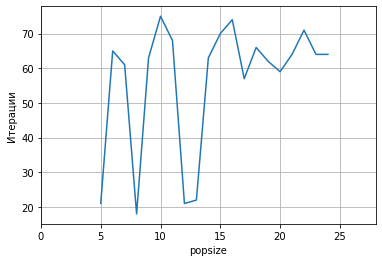

In [16]:
popsizes = [x for x in range(5, 25)]
po = {}
for popsize in popsizes:
    p = differential_evolution(rastrigin, bounds, seed=42, popsize=popsize)
    po[popsize] = p.nit

print("При popsize < 5 результат отличен от x = [0, 0].")
mk_po = min(po, key=po.get)
mv_po = po[mk_po]
print(f"Минимум итераций: {mv_po}, popsize = {mk_po}.")
plt.plot(list(po.keys()), list(po.values()))
plt.xlabel("popsize")
plt.ylabel("Итерации")
plt.xlim(0, 28)
plt.grid()

При tol > ~0.31 результат отличен от x = [0, 0].
Минимум итераций: 3, tol = 0.3.


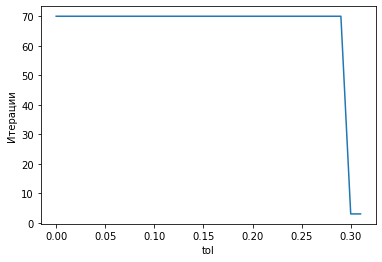

In [17]:
tols = np.linspace(0, 0.31, 32)
to = {}
for tol in tols:
    p = differential_evolution(rastrigin, bounds, seed=42, tol=tol)
    to[tol] = p.nit

print("При tol > ~0.31 результат отличен от x = [0, 0].")
mk_to = min(to, key=to.get)
mv_to = to[mk_to]
print(f"Минимум итераций: {mv_to}, tol = {mk_to}.")
plt.plot(list(to.keys()), list(to.values()))
plt.xlabel("tol")
plt.ylabel("Итерации")
plt.show()

При mutation < ~0.2 результат отличен от x = [0, 0].
Минимум итераций: 6, mutation = 0.2.


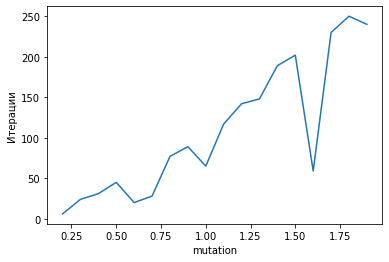

In [18]:
mutations = np.linspace(0.2, 1.9, 18)
mu = {}
for mutation in mutations:
    p = differential_evolution(rastrigin, bounds, seed=42, mutation=mutation)
    mu[mutation] = p.nit
        
print("При mutation < ~0.2 результат отличен от x = [0, 0].")
mk_mu = min(mu, key=mu.get)
mv_mu = mu[mk_mu]
print(f"Минимум итераций: {mv_mu}, mutation = {mk_mu}.")
plt.plot(list(mu.keys()), list(mu.values()))
plt.xlabel("mutation")
plt.ylabel("Итерации")
plt.show()

Минимум итераций: 21, recombination = 0.894736842105263.


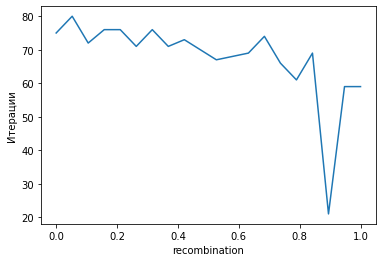

In [19]:
recombinations = np.linspace(0, 1, 20)
re = {}
for recombination in recombinations:
    p = differential_evolution(rastrigin, bounds, seed=42, recombination=recombination)
    re[recombination] = p.nit
        
mk_re = min(re, key=re.get)
mv_re = re[mk_re]
print(f"Минимум итераций: {mv_re}, recombination = {mk_re}.")
plt.plot(list(re.keys()), list(re.values()))
plt.xlabel("recombination")
plt.ylabel("Итерации")
plt.show()

Минимум итераций: 70, updating = 'immediate'.


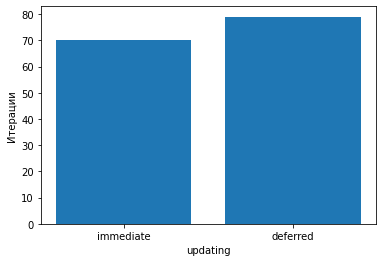

In [20]:
updatings = ["immediate", "deferred"]
up = {}
for updating in updatings:
    p = differential_evolution(rastrigin, bounds, seed=42, updating=updating)
    up[updating] = p.nit

mk_up = min(up, key=up.get)
mv_up = up[mk_up]
print(f"Минимум итераций: {mv_up}, updating = '{mk_up}'.")
plt.bar(list(up.keys()), list(up.values()))
plt.xlabel("updating")
plt.ylabel("Итерации")
plt.show()